In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


## Create synthetic data with 1 feature

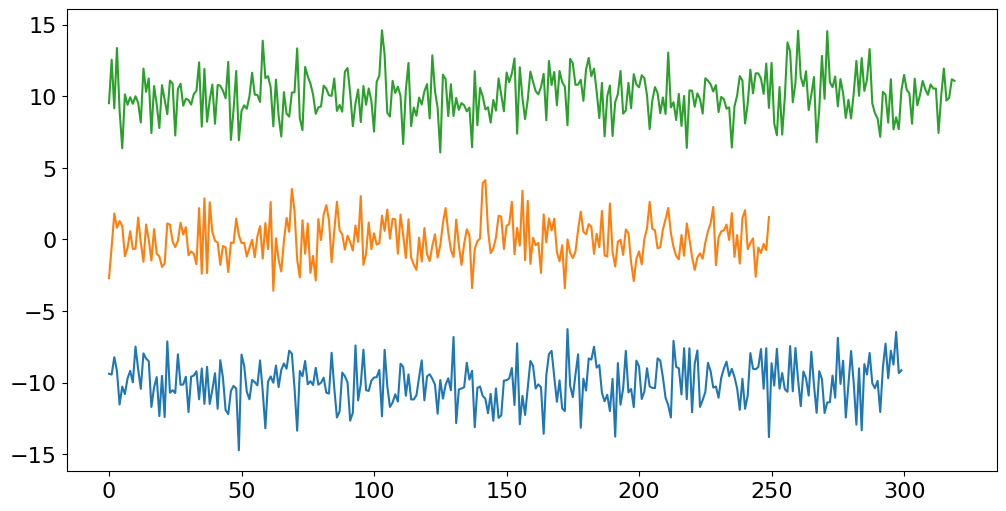

In [2]:
# You may change the sigma to see the impact.
sigma = 1.5
bassfeatures = np.random.normal(loc=-10,scale=sigma,size=300)
tunafeatures = np.random.normal(loc=0,scale=sigma,size=250)
salmonfeatures = np.random.normal(loc=10,scale=sigma,size=320)

s=plt.plot(bassfeatures)
s=plt.plot(tunafeatures)
s=plt.plot(salmonfeatures)

## Construct Xtilde and y matrices

 <font color=red> YOUR CODE BELOW </font>

In [3]:
nClasses = 3
nFeatures = 1

# Replace the ? marks 
# You can split the computation into multiple lines
# Xtilde should be a matrix of size 2x(300+250+320)
X = np.concatenate((bassfeatures, tunafeatures, salmonfeatures)).reshape(1, -1)
bias = np.ones((1, X.shape[1]))
Xtilde = np.vstack((bias, X))  # Xtilde is of size 2x(300+250+320)

# Y should be a matrix of size 3x(300+250+320)
y = np.zeros((nClasses, X.shape[1]))
y[0, :300] = 1  # Bass labels
y[1, 300:550] = 1  # Tuna labels
y[2, 550:] = 1  # Salmon labels


## Multiclass Logistic regression with steepest descent
 <font color=red> YOUR CODE BELOW </font>

28.31458080297177
0.6665955415032481
0.4959526386270856
0.41236600008732677
0.35949709834058036
0.321928575483087
0.29336361052282517
0.27065589381491467
0.25202462215755955
0.2363719166864227


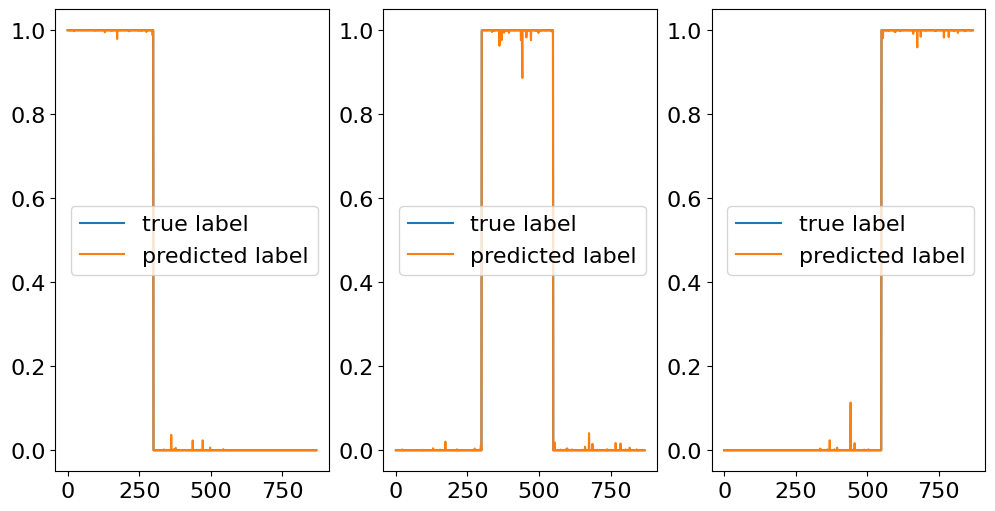

In [4]:
A = np.random.randn(nFeatures+1,nClasses)

gamma = 1e-3
for iter in range(10000):
    
    # Compute predicted probabilities
    P = np.exp(A.T @ Xtilde)  # Shape: (3, 870)
    P = P / np.sum(P, axis=0, keepdims=True)  # Normalize to get probabilities

    # Compute predicted labels (phi)
    phi = P

    # Compute the error
    error = phi - y

    # Compute the gradient
    gradient = Xtilde @ error.T  # Shape: (2, 3)

    
    A = A-gamma*gradient
    if(np.mod(iter,1000)==0):
        print(np.linalg.norm(error,'fro'))

# Plotting the results        
fig,ax = plt.subplots(1,3)
for i in range(nClasses):
    ax[i].plot(y[i],label='true label')
    ax[i].plot(phi[i],label='predicted label')
    ax[i].legend()
